<a href="https://colab.research.google.com/github/NeelvaniVarsha/MLLab/blob/main/Lab07_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. SVM Classifier for IRIS Dataset (RBF and Linear Kernels)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving iris.csv to iris (1).csv


In [ ]:
df=pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X_iris = df.iloc[:, :-1]
y_iris = df.iloc[:, -1]

In [ ]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

In [ ]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train_iris, y_train_iris)
y_pred_linear = model_linear.predict(X_test_iris)

In [ ]:
print("Linear Kernel:")
print("Accuracy:", accuracy_score(y_test_iris, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_linear))

Linear Kernel:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train_iris, y_train_iris)
y_pred_rbf = model_rbf.predict(X_test_iris)


In [ ]:
print("\nRBF Kernel:")
print("Accuracy:", accuracy_score(y_test_iris, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_rbf))


RBF Kernel:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


## 2. SVM Classifier for Letter Recognition Dataset (ROC + AUC)

In [ ]:
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving letter-recognition.csv to letter-recognition.csv


In [ ]:
drug=pd.read_csv('letter-recognition.csv')
drug

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
X_letter = drug.iloc[:, 1:]
y_letter = drug.iloc[:, 0]

In [ ]:
label_encoder = LabelEncoder()
y_letter_encoded = label_encoder.fit_transform(y_letter)

In [ ]:
y_letter_bin = label_binarize(y_letter_encoded, classes=np.unique(y_letter_encoded))
n_classes = y_letter_bin.shape[1]

In [ ]:
X_train_let, X_test_let, y_train_let, y_test_let = train_test_split(X_letter, y_letter_bin, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_let = scaler.fit_transform(X_train_let)
X_test_let = scaler.transform(X_test_let)

In [ ]:
model_letter = OneVsRestClassifier(SVC(kernel='rbf', probability=True))
model_letter.fit(X_train_let, y_train_let)
y_score = model_letter.predict_proba(X_test_let)

In [ ]:
y_pred_labels = model_letter.predict(X_test_let)
acc = accuracy_score(y_test_let.argmax(axis=1), y_pred_labels.argmax(axis=1))
cm = confusion_matrix(y_test_let.argmax(axis=1), y_pred_labels.argmax(axis=1))
print("\nLetter Recognition Dataset:")
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)


Letter Recognition Dataset:
Accuracy: 0.82225
Confusion Matrix:
 [[149   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 39 114   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 23   0 111   0   0   0   1   0   0   0   0   0   0   0   2   0   0   0
    0   0   0   0   0   0   0   0]
 [ 21   0   0 135   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 38   0   0   0 103   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 34   0   0   0   0 105   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0]
 [ 35   0   0   0   0   0 123   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [ 91   0   0   2   0   0   0  45   0   0   1   0   0   0   0   0   0   5
    0   0   0   0   0   0   0   0]
 [ 16   0   0   0   0   0   0   0 128   0   0   0   0   0   0 

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_let[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

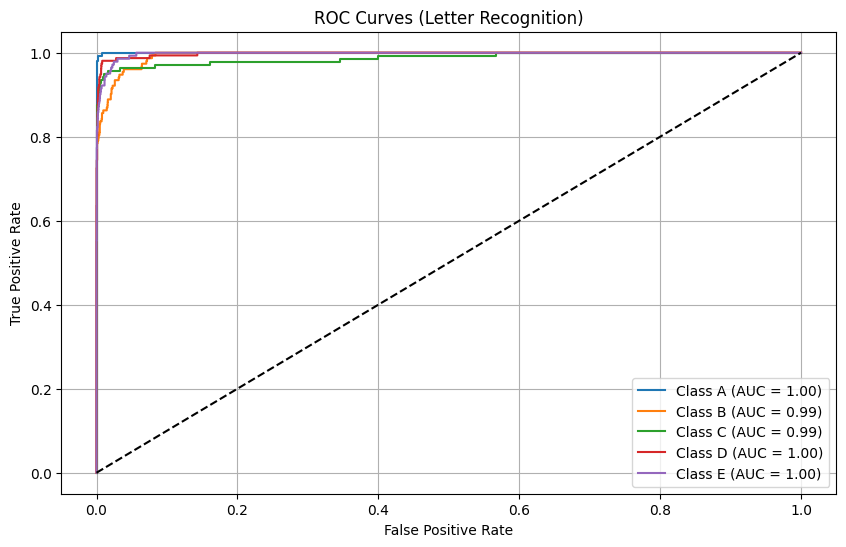

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(min(5, n_classes)):  # Plotting only first 5 classes for clarity
    plt.plot(fpr[i], tpr[i], label=f'Class {label_encoder.inverse_transform([i])[0]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves (Letter Recognition)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()